In [1]:
import numpy as np
import numpy as np
import pandas as pd
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import pickle
from scipy.linalg import svd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
import gensim
from scipy.stats import entropy
from scipy.sparse.linalg import svds
from sklearn.utils.extmath import randomized_svd

In [237]:
print('Loading document-term matrix and vocabulary.....')
# load the document term matrix and vocabulary
with open('/home/vparambath/Desktop/iith/IR-Assignment2/dataset1/doc_term_matrix_50000.pkl','rb')as fp:
    doc_term_matrix = pickle.load(fp) 

    

# print('SVD on term-document matrix....')
U, S, VT = svds(doc_term_matrix.T, k=2)

Loading document-term matrix and vocabulary.....


In [238]:
#U,S, VT = randomized_svd(doc_term_matrix.T, n_components=2)

In [239]:
S

array([15.79794058, 27.7437877 ])

In [240]:
VT.T.shape

(32577, 2)

In [241]:
with open('/home/vparambath/Desktop/iith/IR-Assignment2/dataset1/vocabulary_50000.pkl','rb')as fp:
    vocab = pickle.load(fp) 

In [242]:
inverted_vocab = {v: k for k, v in vocab.items()}

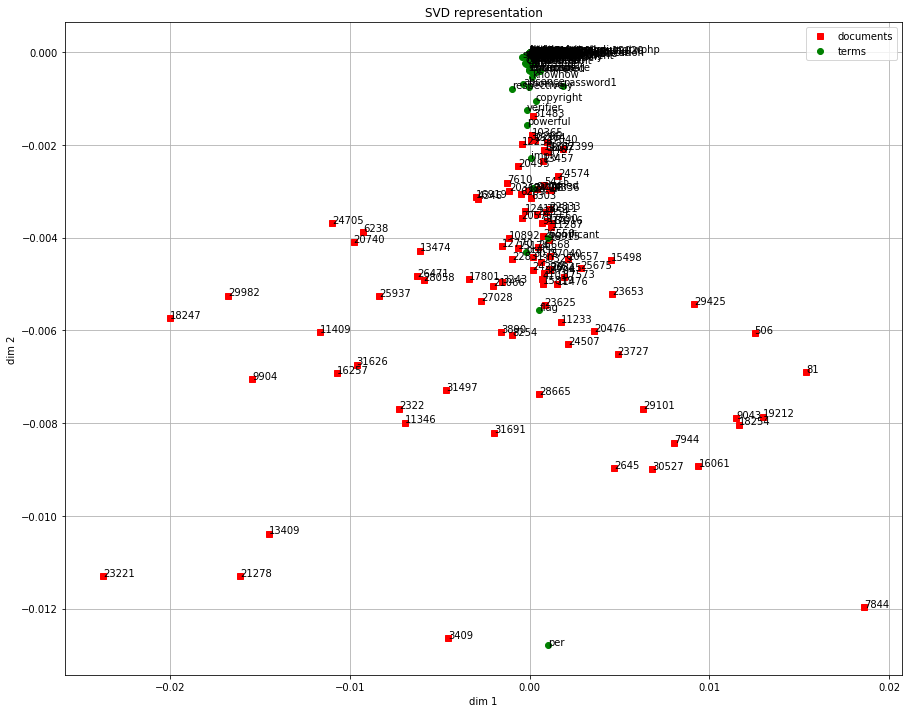

In [246]:
np.random.seed(265)
sampled_term_indices = np.random.choice(len(U), 100)
sampled_doc_indices = np.random.choice(len(VT.T), 100)
terms = U[sampled_term_indices]
docs = VT.T[sampled_doc_indices]

plt.figure(figsize = (15,12))
plt.title('SVD representation')
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.grid()
l1, = plt.plot(docs[:,:1], docs[:,1:2], 'rs')
l2, = plt.plot(terms[:,:1], terms[:,1:2], 'go')
for i, txt_index in enumerate(range(terms.shape[0])):
    plt.annotate(inverted_vocab[sampled_term_indices[i]], (terms[:, :1][i],terms[:, 1:][i]))
    
for i, txt_index in enumerate(range(docs.shape[0])):
    plt.annotate(sampled_doc_indices[i], (docs[:, :1][i],docs[:, 1:][i]))
plt.legend((l1,l2), ('documents', 'terms'))
plt.show()

In [137]:
with open('/home/vijin/iith/ds-projects/data/text-analysis/dataset1/doc_term_matrix_50000.pkl','rb')as fp:
    doc_term_matrix = pickle.load(fp)
    
with open('/home/vijin/iith/ds-projects/data/text-analysis/dataset1/vocabulary_50000.pkl','rb')as fp:
    vocab = pickle.load(fp)

In [138]:
n_components=250

In [139]:
svd = TruncatedSVD(n_components=n_components, n_iter=7, random_state=42)
reduced_matrix = svd.fit_transform(doc_term_matrix.T)

In [140]:
polysemy_words = ['absorb', 'acquire', 'admit', 'assume', 'claim', 'conclude', 'cut',
                  'deny', 'dictate', 'drive', 'edit', 'enjoy', 'fire', 'grasp', 'know', 
                  'launch', 'explain', 'fall', 'lead', 'meet', 'go']
polysemy_indices = [vocab[x] for x in polysemy_words]

In [141]:
for i, index in enumerate(polysemy_indices):
    print(index, polysemy_words[i])
    print([inverted_vocab[x] for x in euclidean_distances(reduced_matrix, reduced_matrix[index]
                         .reshape(-1,n_components)).flatten().argsort()[1:6]])

2005 absorb
['footandmouth', 'accountable', 'accordingly', 'accounting', 'accra']
2326 acquire
['liepoisson', 'patiente', 'vinegar', 'ellen', 'admissible']
2621 admit
['strapping', 'hereby', 'tilt', 'bist', 'immunoblots']
4701 assume
['battlefi', 'letter', 'sos3', 'nach', 'suprathreshold']
8463 claim
['pente', 'transpiration', 'matrixvector', 'cochannel', 'tout']
9696 conclude
['treebased', 'attentioncontrol', 'subcommissural', 'acquires', 'nce']
11139 cut
['aryl', 'h2b', 'analgesia', 'lt4induced', 'peroperative']
12126 deny
['diapause', 'embryological', 'dividing', 'oligodendroglial', 'alpha1beta1gammadelta']
12635 dictate
['lipoproteina', 'lipofuscin', 'psychoanalytic', 'craniomaxillofacial', 'sdrp']
13718 drive
['haemophilia', 'forestomach', 'btype', 'favoritism', 'sensitizer']
14227 edit
['elite', 'shiftbased', 'eliminating', 'p600', 'p2x7']
14981 enjoy
['rriv', 'outofphase', 'bard', 'exclusive', 'ncbi']
17024 fire
['reminder', 'stepsize', 'seating', 'coast', 'conjunctive']
18868 g